## __8. 그래디언트 소실과 가중치 초기화__  
  
  + __그래디언트 소실방지 방법__  
  : 활성화 함수로 'ReLU' 또는 'LeakyReLU' 함수 적용하고 He 초기화 사용하기  
  

In [6]:
## MNIST 데이터 로드 후 He 초기화, ReLU 또는 LeakyReLU 함수 불러오기
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import datetime

#1
(x_train, y_train), (x_test,y_test) = mnist.load_data()

#2 : normalize images
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

#3 : one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) # he_normal
y_test = tf.keras.utils.to_categorical(y_test)

#4 : build a model (다른 방법들 있음)
## 4-1
init = tf.keras.initializers.he_normal()
act = tf.keras.activations.relu

## 모델 정의하고, 모델 완전 연결 층에 ReLU 활성화 함수 적용
n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=10,activation='softmax',kernel_initializer=init))
model.summary()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)              

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


### __mnist 손글씨 data__

In [10]:
## Batch Normalization(배치 정규화)
## 미니배치 단위로 층의 출력을 평균 0, 분산 1로 정규화
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#1
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

#2 : normalize images(이미지 정규화)
X_train = X_train.astype('float32')
x_test = x_test.astype('float32')
X_train /= 255.0
x_test /= 255.0

#3 : one-hot encoding
Y_train = tf.keras.utils.to_categorical(Y_train) # he_normal
y_test = tf.keras.utils.to_categorical(y_test)

#4 : build a model
init = tf.keras.initializers.RandomUniform(0.0,1.0)
act = tf.keras.layers.LeakyReLU(alpha=0.3)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### __cifar 10 data__

In [9]:
## Batch Normalization(배치 정규화)
## 미니배치 단위로 층의 출력을 평균 0, 분산 1로 정규화
# cifar10 data
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

#1
(Xc_train, Yc_train), (xc_test, yc_test) = cifar10.load_data()

#2 : normalize images(이미지 정규화)
Xc_train = Xc_train.astype('float32')
xc_test = xc_test.astype('float32')
Xc_train /= 255.0
xc_test /= 255.0
print(Xc_train)
#3 : one-hot encoding
Yc_train = tf.keras.utils.to_categorical(Yc_train) # he_normal
yc_test = tf.keras.utils.to_categorical(yc_test)

#4 : build a model
init = 'he_uniform'
act = tf.keras.layers.LeakyReLU(alpha=0.3)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [9]:
## MLP 모델 정의
n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(units=n,activation=act,kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=10,activation='softmax',kernel_initializer=init))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                      

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [10]:
#5 : creates a summary file writer for the given log directory
## 학습 로그(log) 기록할 디렉토리 지정
import os
path = "/Users/USER/Desktop/"
if not os.path.isdir(path):
    os.mkdir(path)
logdir = path + '3203'

file_writer = tf.summary.create_file_writer(logdir + '/gradient')
file_writer.set_as_default()

In [ ]:
#6 : 각 층 별 기울기(gradient)의 평균 계산하고, 히스토그램으로 나타내기


In [ ]:
## callback 지정 후 모델 훈련
callback1 = GradientCallBack() # freq = 10
callback2 = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=10) # profile batch=0
#7 : train and evaluate the model
ret = model.fit(x_train, y_train, epochs=101, batch_size=200, validation_split=0.2,
                verbose=2, callbacks=[callback1,])

### __과적합, 가중치 규제__


In [5]:
## 가중치 규제 적용하지 않고 모델 구축 후 학습, 평가
#4 : build a model without regularization

act = 'relu'
init = 'he_uniform'

n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

#4-1 : configure the model for training
opt = 'rmsprop'
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

#4-2 : train and evaluate the model
ret = model.fit(X_train, Y_train, epochs=101, batch_size=400,
                validation_data=(x_test,y_test),verbose=0)

train_loss , train_acc = model.evaluate(X_train,Y_train, verbose=2)
test_loss , test_acc = model.evaluate(x_test,y_test, verbose=2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
1875/1875 - 2s - loss: 2.4671e-05 - accuracy: 1.0000 - 2s/epoch - 902us/step
313/313 - 0s - loss: 0.1240 - accuracy: 0.9810 - 246ms/epoch - 785us/step


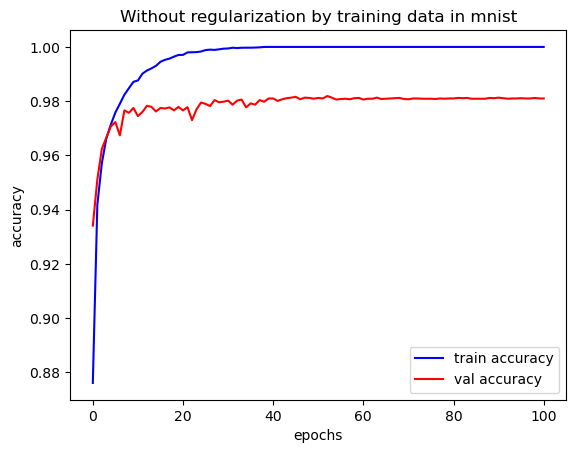

In [6]:
#4-3 : plot accuracies
plt.title('Without regularization by training data in mnist')
plt.plot(ret.history['accuracy'], 'b-', label='train accuracy')
plt.plot(ret.history['val_accuracy'],'r-',label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

In [5]:
## Dropout
## 0.2로 dropout 비율을 설정하고 모델 학습시키기

n = 100
dropout_rate = 0.2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

# 4-1 : configure the model for training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#4-2 : train and evaluate the model
ret = model.fit(X_train, Y_train,epochs=201, batch_size=400,
                validation_data=(x_test,y_test),verbose=0) 
train_loss, train_acc = model.evaluate(X_train,Y_train,verbose=2)
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trai

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1875/1875 - 2s - loss: 0.0133 - accuracy: 0.9965 - 2s/epoch - 930us/step
313/313 - 0s - loss: 0.0989 - accuracy: 0.9764 - 276ms/epoch - 883us/step


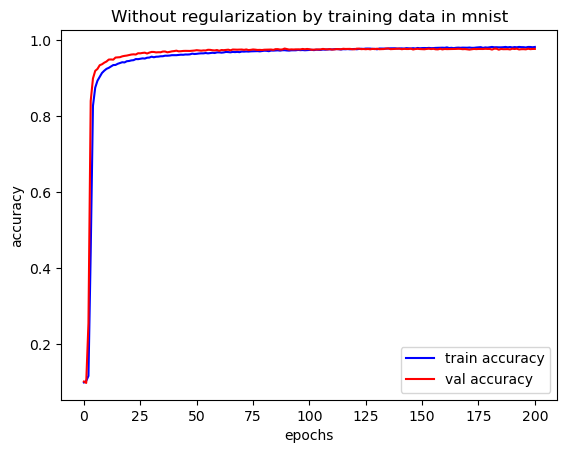

In [6]:
#4-3 : plot accuracies
plt.title('Without regularization by training data in mnist')
plt.plot(ret.history['accuracy'], 'b-', label='train accuracy')
plt.plot(ret.history['val_accuracy'],'r-',label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

In [16]:
## cifar10 data 이용한 모델 학습
## Dropout
## 0.2로 dropout 비율을 설정하고 모델 학습시키기

n = 100
dropout_rate = 0.3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=n, activation='relu', kernel_initializer=init))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

# 4-1 : configure the model for training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#4-2 : train and evaluate the model
ret1 = model.fit(Xc_train, Yc_train,epochs=201, batch_size=400,
                validation_data=(xc_test,yc_test),verbose=0) 
train_loss, train_acc = model.evaluate(Xc_train,Yc_train,verbose=2)
test_loss, test_acc = model.evaluate(xc_test,yc_test,verbose=2)

ValueError: Input 0 of layer "max_pooling2d_4" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 3072)